In [ ]:
# 02. Neural Network Classification with pytorch

Classification is a problem of prediction wheter something is one thing or another(there can by multiple things as the options)

In [ ]:
import os
import torch
torch.cuda.empty_cache()
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = '1'

## 1. Make classfications data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [ ]:
type(X), len(X), len(y)

(numpy.ndarray, 1000, 1000)

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({
  'X1': X[:, 0],
  'X2': X[:, 1],
  'label': y
})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

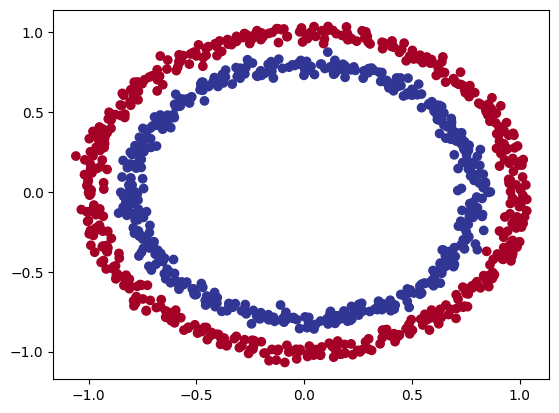

In [ ]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt
plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)

**Note**: This dataset is often what's considered a toy problem (a problem that's used to try and test things out on) in machine learning.

###1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
torch.__version__

'2.1.0+cu118'

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data into tensors
x = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2, # 20% test, 80% train
    random_state=42 # make the random split reproducible
)
len(X_train), len(X_test), len(y_train), len(y_test), X_train

(800,
 200,
 800,
 200,
 tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]))

## 2. Building a model

Let's build a model to classify  our blue and red dots.

To do so, we want to:

  1. Setup device agnostic code so our code will run on an acceleretor (GPU) if thres is one
  2. Construct a model (by suclassing `nn.Module`)
  3. Define a loss function
  4. create a traning loop

Now we've setup device agnostic code, let's create a model that:

1. Subclass `nn.Modules` (almos all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are caple of handling the shapes of our data
    * out_features: Number of neuron of the layer
    * in_features: input shape of each neuron of the layer
3. Defines a `forward()` method that outlines the forward pass (or forwar computation) of the model
4. Instantiante an instance of our model class and send it to the target device

In [ ]:
# Import Pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
!CUDA_LAUNCH_BLOCKING=1

In [ ]:
# 1. Construct a model class that subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers caple of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features of X, produces 5 features (has 5 neurons with 2 inputs)
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features of layer_1, produces 1 feature y (it has 1 neuron with 5 inputs)

    # self.two_layers = nn.Sequential(
    #     nn.Linear(in_features=2,out_features=5),
    #     nn.Linear(in_features=5,out_features=1),
    # )

    # 3. DEfine a forward method containing the forward pass computation
  def forward(self, x):
    # Return the output of layer_2, a single feature, the same shape asy
    return self.layer_2(self.layer_1(x)) # computation goes though layer_1 then output of layer_1 goes through layer_2
    # return self.two_layers(x)

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Replciate CircleModelV0 with nn.Sequential
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=1, out_features=1)
)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [ ]:
# Make predictions with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE(Mean Absolute Error or Mean Square Error)

For classification you might want Binary Cross Entropy or Categorical Cross Entropry(Cross Entropy)

As a reminder, the loss function meases how *wrong* your model predictions are

And for optimizers, two of the most common and userful are SGD and Adam, however Pytorch  
has many build-in options.

* For the loss function we're goin to use `torch.nn.BECWithLoss()`

In [ ]:
# Setup the loss function
#loss_fn = nn.BCELoss() # BCELoss requires inputs to have gone through the sigmoid activation prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation funcion build-in

In [ ]:
# Setup the optimizer
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr= 0.1
)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer step(gradient descent)

### 3.1 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)
Our model outputs are going to be raw logits(raw output of a layer, in this case the logits are from the last layers)

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification or softmax for multclass classification).

Then we can convert out model's prediction probabilities to prediction labels  by either rouding them or takin the `argmax()`.


In [ ]:
# View the firts 5 outputs of the forward pass on the test data
model_0.eval()

with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rouding on them:

- `y_pred_prob` >= 0.5 -> y=1(class 1)
- `y_pred_prob` < 0.5 -> y=1(class 0)


In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred prob -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
device

'cuda'

### 3.2 Building a train and test loop

In [ ]:
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [ ]:
#torch.manual_seed(42)

# Set the number of epochs
epochs = 200


# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train.to(device)).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)).to(device) # turn logits -> pred probs -> pred labls
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 10 | Loss: 0.69403, Accuracy: 50.00% | Test loss: 0.69615, Test acc: 50.00%
Epoch: 20 | Loss: 0.69343, Accuracy: 46.00% | Test loss: 0.69585, Test acc: 48.50%
Epoch: 30 | Loss: 0.69321, Accuracy: 49.00% | Test loss: 0.69577, Test acc: 47.50%
Epoch: 40 | Loss: 0.69312, Accuracy: 49.50% | Test loss: 0.69573, Test acc: 46.50%
Epoch: 50 | Loss: 0.69308, Accuracy: 50.38% | Test loss: 0.69569, Test acc: 46.50%
Epoch: 60 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69564, Test acc: 46.50%
Epoch: 70 | Loss: 0.69305, Accuracy: 50.50% | Test loss: 0.69559, Test acc: 46.50%
Epoch: 80 | Loss: 0.69304, Accuracy: 50.75% | Test loss: 0.69553, Test acc: 46.50%
Epoch: 90 | Loss: 0.69303, Accuracy: 50.38% | Test loss: 0.69547, Test acc: 46.50%
Epoch: 100 | Loss: 0.69302, Accuracy: 50.50% | Test loss: 0.69542, Test acc: 46.50%
Epoch: 110 | Loss: 0.69302, Accuracy: 50.62% | Test loss: 0.69537, Test acc: 46.00%
Epo

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't leaning anything...

So to inspect it let's make some predictions and make them visual

In other words, "Visualize, Visualize, Visualize"

To so, we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

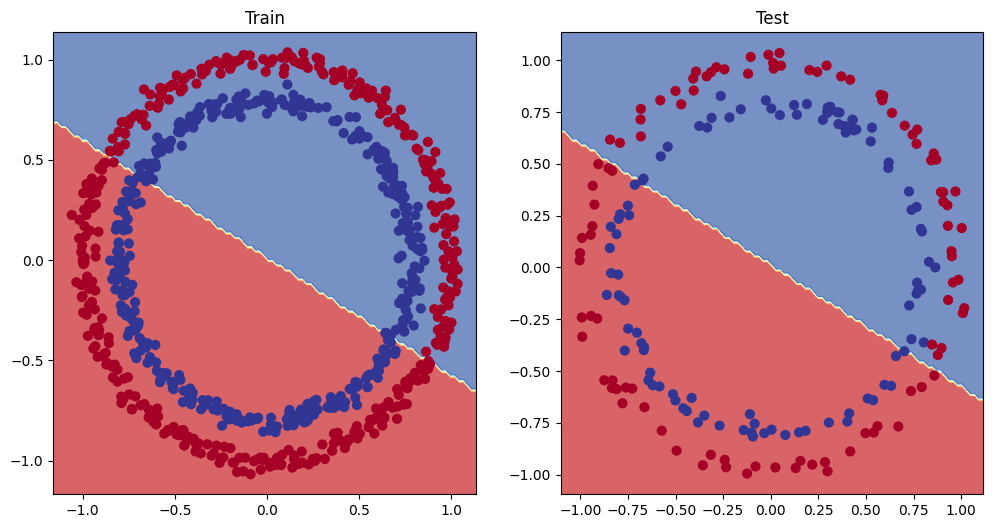

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improve a model (from a model pesctecive)

- Add more layers - gives the model more chances to learn about de patterns in the data
- Add more hidden units - go from 5 hidden units to 10 hidden units
- Fit to longer - give more time
- Changing the activation functions
- Changi the learning rate
- Change the loss function

The options are all from a model's pespective because they deal directly with the model, rather than the data

And because these options are all values we(as machine learning engineers and data scientists) can change, they are refer as **hyperparameters**

Let's try improve the model by;
1. Addig more hidden units 5 -> 10
2. Increase the number of layers 2 ->
3. Increa the number of epochs 100 -> 1000

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5425,  0.5880],
                      [-0.1825,  0.6401],
                      [-0.1600,  0.1398],
                      [-0.3347,  0.4206],
                      [ 0.6171, -0.5223]])),
             ('layer_1.bias',
              tensor([0.6107, 0.1631, 0.5303, 0.0778, 0.3520])),
             ('layer_2.weight',
              tensor([[-0.0510,  0.3487,  0.1161, -0.1961,  0.1287]])),
             ('layer_2.bias', tensor([-0.1180]))])

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed up where possible behind the scenes

model_1 = CircleModelV1().to(device)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
# Setup the optimizer
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr= 0.1
)

In [ ]:
 #Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


model_1.train()
model_1.to(device)

for epoch in range(epochs):


  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> pred probabilities -> predicted label

  # 2.  Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  model_1.eval()
  with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels


      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69587, Accuracy: 46.38% | Test Loss: 0.70046, Test Accuracy: 48.00%
Epoch: 100 | Loss: 0.69312, Accuracy: 51.25% | Test Loss: 0.69596, Test Accuracy: 47.00%
Epoch: 200 | Loss: 0.69300, Accuracy: 51.00% | Test Loss: 0.69507, Test Accuracy: 45.50%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.50% | Test Loss: 0.69480, Test Accuracy: 46.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 50.88% | Test Loss: 0.69471, Test Accuracy: 45.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.38% | Test Loss: 0.69469, Test Accuracy: 45.50%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.25% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69468, Test Accuracy: 46.00%


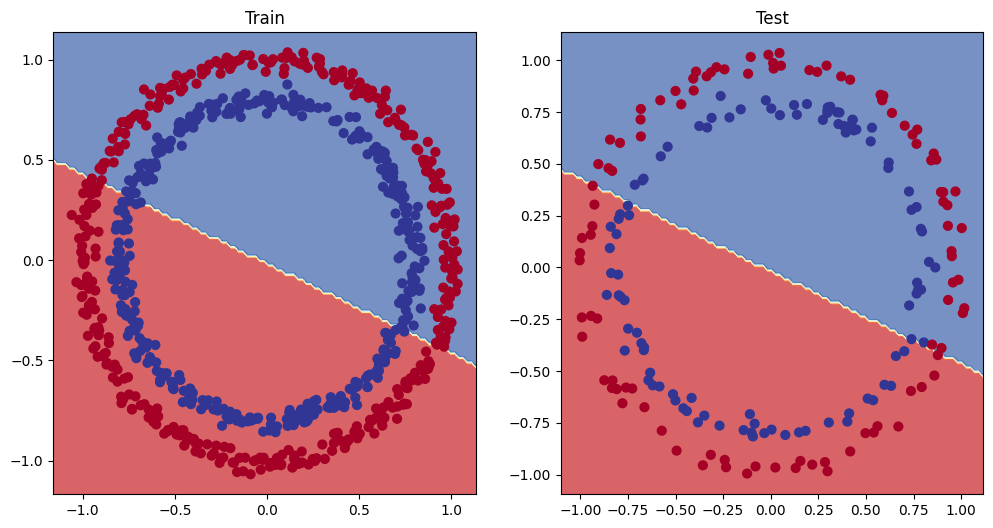

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to  see if our model can fit a stright line

One away to troubleshoot  to a longer problem is to test out a small problem

In [ ]:
# Create some data(same as notebook 1)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula(without epsion)

# Check the Data
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Checks the lengths o each
print(len(X_train_regression), len(y_train_regression))
print(len(X_test_regression), len(y_test_regression))

80 80
20 20


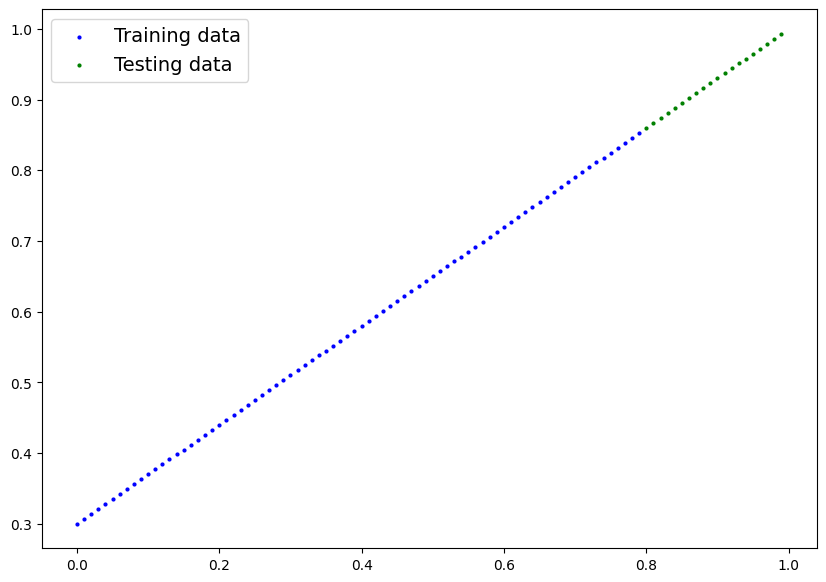

In [ ]:
plot_predictions(
    train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
)

### 5.2 Adjusting `model_1` to fit a stright line

In [ ]:
# Same architecture as model_1(but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimization
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
 #Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


for epoch in range(epochs):
  model_2.to(device)
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f},  Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986,  Test Loss: 0.54143
Epoch: 100 | Loss: 0.09309,  Test Loss: 0.02901
Epoch: 200 | Loss: 0.07376,  Test Loss: 0.02850
Epoch: 300 | Loss: 0.06745,  Test Loss: 0.00615
Epoch: 400 | Loss: 0.06107,  Test Loss: 0.02004
Epoch: 500 | Loss: 0.05698,  Test Loss: 0.01061
Epoch: 600 | Loss: 0.04857,  Test Loss: 0.01326
Epoch: 700 | Loss: 0.06109,  Test Loss: 0.02127
Epoch: 800 | Loss: 0.05599,  Test Loss: 0.01426
Epoch: 900 | Loss: 0.05571,  Test Loss: 0.00603


ERROR: mat1 and mat2 shapes cannot be multiplied (80x10 and 1x10)

Look at the in_features and out_features each layer

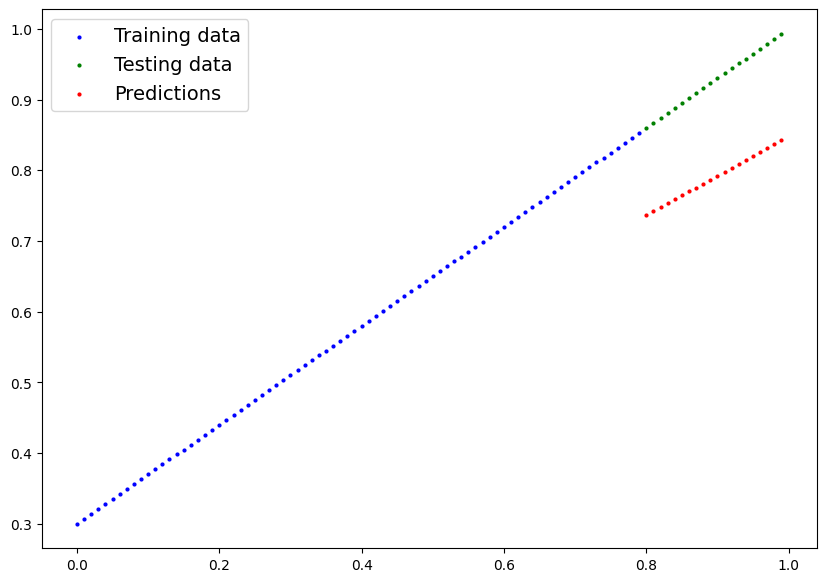

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)


# Plot data and predictions with data on the CPU(matplotlib can't handle data on de GPU)
# (Tre removing .cpu() from one of the below andd see what happens)
plot_predictions(
    train_data = X_train_regression.cpu(),
    train_labels = y_train_regression.cpu(),
    test_data = X_test_regression.cpu(),
    test_labels = y_test_regression.cpu(),
    predictions=y_preds.cpu()
)


##6. The missing peace: Non-linearity

"What patterns could you drwa if you were given an infinite amount of a straight line and non-straight lines?"

Or in machine learning terms, an infinite(bu really it is finite) of linear and non-linear functions?

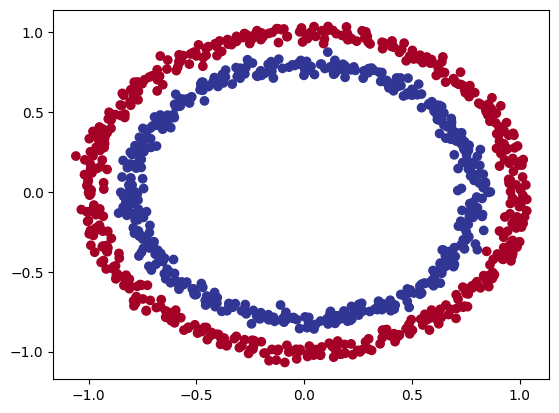

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Aplit into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

###6.2 Building a model with non-linearity
 - Linear = Straight line
 - Non-linear = non_strights lines

 Artificial neural networks are larges combinations of linear(stright) and non-straight (non-linear) functions which are potentially able to find patterns in data

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation funciton

  def forward(self, x):
    # Where should we put our non_liear activation function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

###6.3 Training a model with non-linearity

In [ ]:
# Setup the loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.3)

In [ ]:
# Fit the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 10000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69306, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68796, Accuracy: 53.00% | Test Loss: 0.68720, Test Accuracy: 56.00%
Epoch: 200 | Loss: 0.67525, Accuracy: 54.37% | Test Loss: 0.67280, Test Accuracy: 56.50%
Epoch: 300 | Loss: 0.62461, Accuracy: 73.75% | Test Loss: 0.62162, Test Accuracy: 78.50%
Epoch: 400 | Loss: 0.37448, Accuracy: 97.38% | Test Loss: 0.40781, Test Accuracy: 92.50%
Epoch: 500 | Loss: 0.36910, Accuracy: 76.75% | Test Loss: 0.45300, Test Accuracy: 73.50%
Epoch: 600 | Loss: 0.08191, Accuracy: 100.00% | Test Loss: 0.11981, Test Accuracy: 97.50%
Epoch: 700 | Loss: 0.04117, Accuracy: 100.00% | Test Loss: 0.06974, Test Accuracy: 99.00%
Epoch: 800 | Loss: 0.02686, Accuracy: 100.00% | Test Loss: 0.04934, Test Accuracy: 99.00%
Epoch: 900 | Loss: 0.01987, Accuracy: 100.00% | Test Loss: 0.04013, Test Accuracy: 99.00%
Epoch: 1000 | Loss: 0.01586, Accuracy: 100.00% | Test Loss: 0.03490, Test Accuracy: 99.50%
Epoch: 1100 | Los

## 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

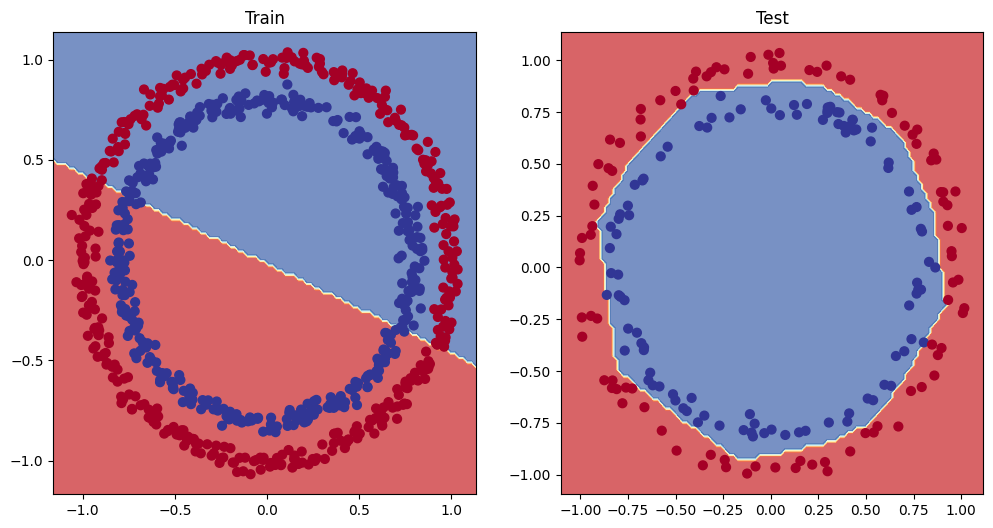

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity


## 7.  Replication non-linear activationsfunctions

Neural networks, rather than us telling the model t what to learn, we give it the tools  to discover patterns in data ans int tries to figure out the pattern on its own

And these tools are linear & not-linear functions

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

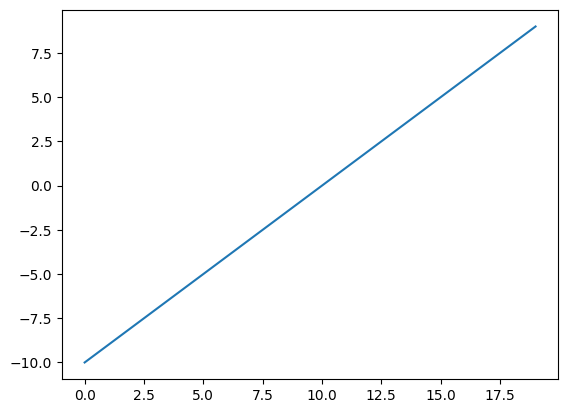

In [ ]:
# Visualize the tensor
plt.plot(A)

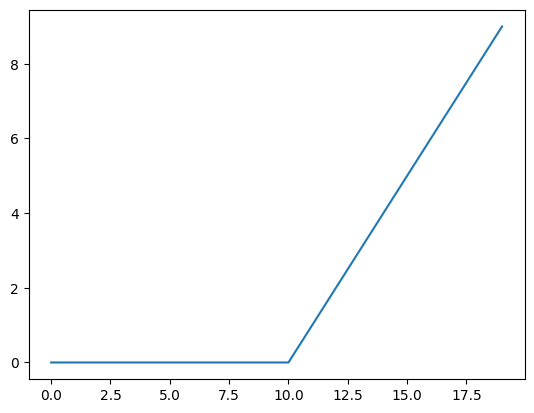

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # Inputs must be tensors

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

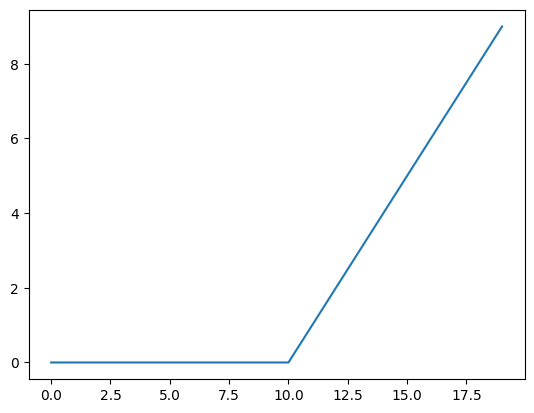

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A))

In [ ]:
# Not let's do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

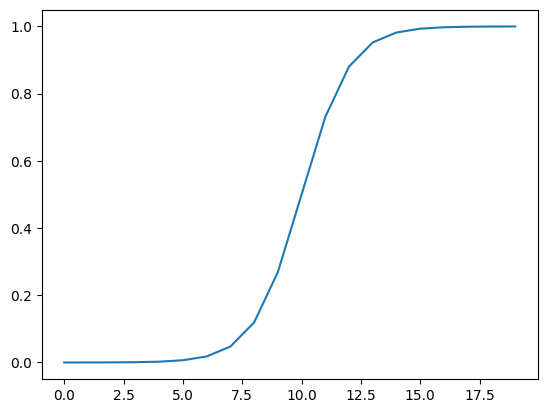

In [ ]:
plt.plot(torch.sigmoid(A))

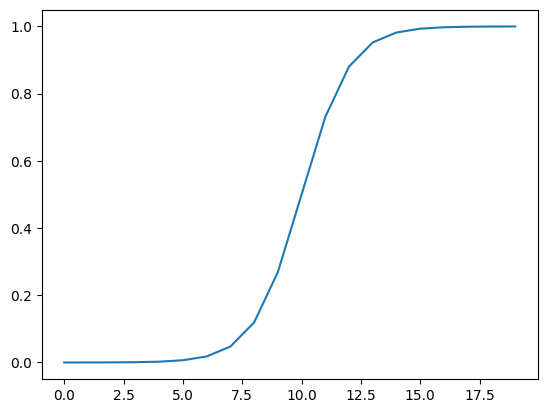

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting all together by building a multi-class PyTorch model

* Binary classificcation = one thing or another
* Multiclass classification = more one thing or another(three or more classes)

###8.1 Creating a multi-class classification data


In [ ]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

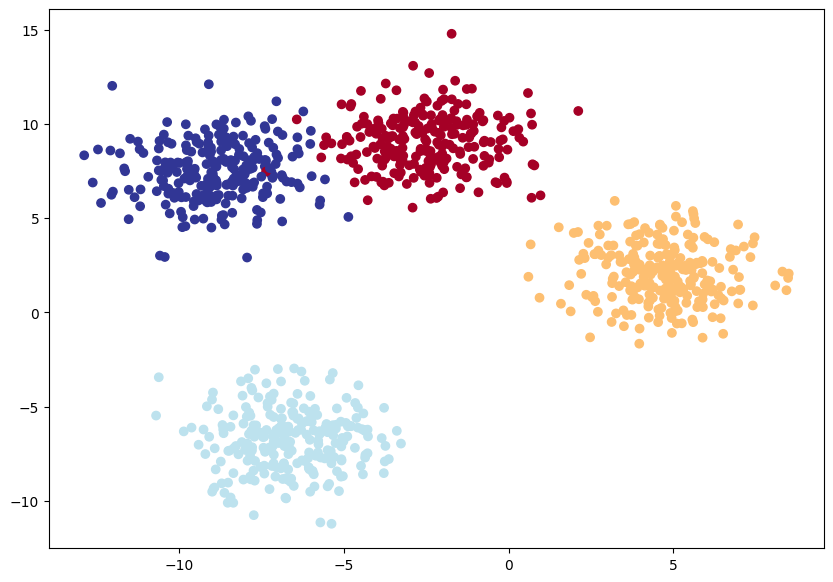

In [ ]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEDD = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES, # x features
    centers=NUM_CLASSES, # labels
    cluster_std=1.5 ,# Give the clusters a little shake up(Try change this to 1.0, the default)
    random_state=RANDOM_SEDD
)

# 2. Turn data in into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEDD

)

# Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

## 8.1 Building a multi-class classification model in pytorch

In [ ]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Build model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes all hyperparemeters for a  multi-class classification model

    Args:
        input_features (int): Number of input features to the model
        out_features (int): Number of output features of the model (how many classes there are)
        hidden_units (int): Number of hidden units between layers, default 8
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create a instance of blob model and send it to target device
model_4 = BlobModel(
    input_features=NUM_FEATURES,
    output_features=NUM_CLASSES,
    hidden_units=8
).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0

## Creating a loss function and optimizer for a multi-class pytorch model

In [ ]:
# Create a loss function for multi-class classfication
loss_fn = nn.CrossEntropyLoss()

# Create a optimizer for multi-class classfication
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1) # lr = learning rate

## 8.4 Getting prediction probabilities for a multi-class Pytorch model

In order to evaluete and train and test our model, we need to convert out model's outputs(logits) to prediction probabilities  and then to predict labels.

Logits(Raw output of the model)-> Pred Probabilitie(use `torch.softmax`) -> Labels(Take the argmax of the prediction probabilities)

In [ ]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4.eval()
model_4.to(device)
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:5]

tensor([[-2.1800e-01, -4.5263e-01,  1.7356e-01, -5.7936e-05],
        [ 1.8045e-01, -8.1817e-01,  5.7332e-01, -1.7941e-01],
        [-1.8330e-01, -3.9209e-01, -3.3045e-02,  1.4033e-01],
        [-2.5270e-01, -4.1486e-01,  9.3066e-02,  6.7566e-02],
        [-5.8215e-02, -6.2655e-01,  5.4422e-01, -3.1144e-01]], device='cuda:0')

In [ ]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-2.1800e-01, -4.5263e-01,  1.7356e-01, -5.7936e-05],
        [ 1.8045e-01, -8.1817e-01,  5.7332e-01, -1.7941e-01],
        [-1.8330e-01, -3.9209e-01, -3.3045e-02,  1.4033e-01],
        [-2.5270e-01, -4.1486e-01,  9.3066e-02,  6.7566e-02],
        [-5.8215e-02, -6.2655e-01,  5.4422e-01, -3.1144e-01]], device='cuda:0')
tensor([[0.2215, 0.1752, 0.3277, 0.2755],
        [0.2819, 0.1038, 0.4176, 0.1967],
        [0.2296, 0.1863, 0.2668, 0.3173],
        [0.2155, 0.1832, 0.3045, 0.2968],
        [0.2398, 0.1359, 0.4381, 0.1862]], device='cuda:0')


In [ ]:
# Each line after the softmax has sum equals 1
# Remenber: Argmax takes the index of the largest valor of a tensor, and here each prediction is a tensor
# with four values
print(torch.sum(y_pred_probs[0])), print(torch.argmax(y_pred_probs[0]))

tensor(1., device='cuda:0')
tensor(2, device='cuda:0')


(None, None)

In [ ]:
# The greather number of the logits after softmax is the model classification answer
print(torch.max(y_pred_probs[0]))

tensor(0.3277, device='cuda:0')


In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3,
        3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3,
        3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2,
        3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2,
        2, 2, 3, 2, 2, 2, 3, 2], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

## Creating a training and test loop for a multi-class pytorch model

In [ ]:
#
torch.cuda.manual_seed(42)
torch.manual_seed(42)

epochs = 300


# Send the tensors to the target divice
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
model_4.to(device)


# For epoch in a range
for epoch in range(epochs):

  # Do the foward pass
  model_4.train()
  y_logits = model_4(X_blob_train) # Logits
  y_pred = torch.softmax(y_logits, dim=1) # prediction probabilities
  y_pred = y_pred.argmax(dim=1) # Labels

  # Calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  # In a classification task in a good practice analize the accuracy
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  # Zero grad
  optimizer.zero_grad()

  # backward
  loss.backward()

  # Step optimizer
  optimizer.step()

  if epoch % 10 == 0:
    model_4.eval()
    with torch.inference_mode():
      y_logits_test = model_4(X_blob_test)
      y_pred_test = torch.softmax(y_logits_test, dim=1).argmax(dim=1)

      test_loss = loss_fn(y_logits_test, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test, y_pred=y_pred_test)


    print(f"Epoch: {epoch} | Loss : {loss}, Acc: {acc:.2f} | Test loss: {test_loss:4f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss : 0.03312220424413681, Acc: 99.25 | Test loss: 0.024327, Test acc: 99.50%
Epoch: 10 | Loss : 0.03160199150443077, Acc: 99.25 | Test loss: 0.022611, Test acc: 99.50%
Epoch: 20 | Loss : 0.030443642288446426, Acc: 99.25 | Test loss: 0.021263, Test acc: 99.50%
Epoch: 30 | Loss : 0.02957981824874878, Acc: 99.25 | Test loss: 0.020221, Test acc: 99.50%
Epoch: 40 | Loss : 0.028892885893583298, Acc: 99.25 | Test loss: 0.019397, Test acc: 99.50%
Epoch: 50 | Loss : 0.02833377569913864, Acc: 99.25 | Test loss: 0.018722, Test acc: 99.50%
Epoch: 60 | Loss : 0.02786838263273239, Acc: 99.25 | Test loss: 0.018154, Test acc: 99.50%
Epoch: 70 | Loss : 0.027471859008073807, Acc: 99.25 | Test loss: 0.017664, Test acc: 99.50%
Epoch: 80 | Loss : 0.027130110189318657, Acc: 99.25 | Test loss: 0.017235, Test acc: 99.50%
Epoch: 90 | Loss : 0.02683264948427677, Acc: 99.25 | Test loss: 0.016853, Test acc: 99.50%
Epoch: 100 | Loss : 0.02657138556241989, Acc: 99.25 | Test loss: 0.016512, Test acc: 99

RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Float'

Look at the types of params of the loss functions

## 8.6 Making and evaluationg predictions with a pytorch multi-class model

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[ -1.2936,   8.8913,  -9.4512, -10.5444],
        [ -2.4560,  -8.1329,  -5.2132,   4.5728],
        [ -4.6979,  -5.1014,   4.6407,  -3.6877],
        [ -2.0091,   6.4354,  -4.9649,  -6.1123],
        [  5.6706,  -1.8388, -11.2467,  -8.5158],
        [ -3.1123,  -9.6345,  -6.1134,   5.5244],
        [ -4.1428,  -4.3712,   4.0704,  -3.0643],
        [  5.0616,  -5.5500,  -8.6401,  -4.2542],
        [ -5.9770,  -6.5211,   5.6944,  -4.7317],
        [  5.3337,  -4.1675,  -9.3571,  -5.6644]], device='cuda:0')

In [ ]:
# Go from logits to predicitons probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[3.7736e-05, 9.9996e-01, 1.0813e-08, 3.6238e-09],
        [8.8512e-04, 3.0307e-06, 5.6178e-05, 9.9906e-01],
        [8.7925e-05, 5.8733e-05, 9.9961e-01, 2.4146e-04],
        [2.1503e-04, 9.9977e-01, 1.1190e-05, 3.5524e-06],
        [9.9945e-01, 5.4758e-04, 4.4943e-08, 6.8976e-07],
        [1.7744e-04, 2.6090e-07, 8.8241e-06, 9.9981e-01],
        [2.7070e-04, 2.1541e-04, 9.9872e-01, 7.9589e-04],
        [9.9988e-01, 2.4624e-05, 1.1204e-06, 8.9980e-05],
        [8.5342e-06, 4.9527e-06, 9.9996e-01, 2.9647e-05],
        [9.9991e-01, 7.4757e-05, 4.1672e-07, 1.6733e-05]], device='cuda:0')

In [ ]:
# Got from pred probs tp preds labels
y_pred_probs = y_pred_probs.argmax(dim=1)
y_pred_probs

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

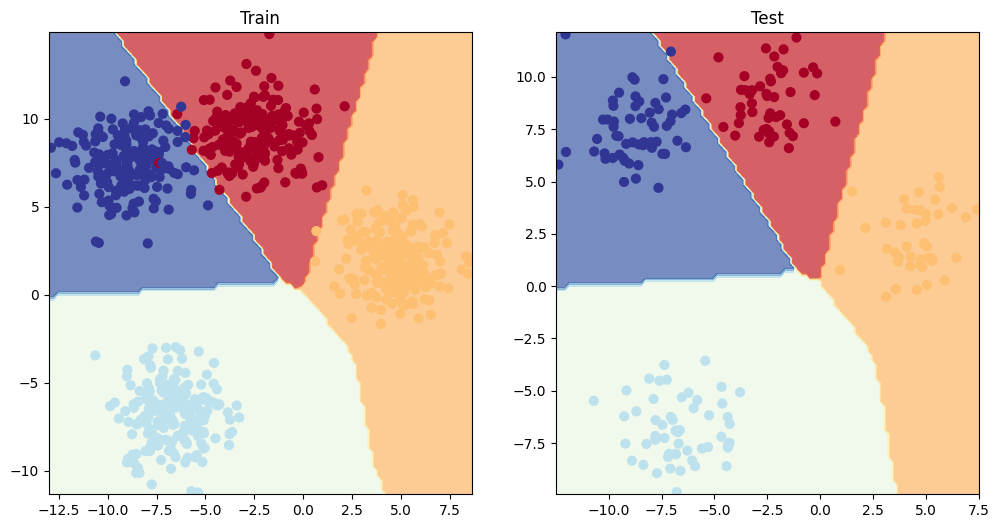

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


# 9. More classification evaluation metrics (to evaluate our classification model)

* Accuracy: Out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion martrix
* Classification report

https://torchmetrics.readthedocs.io/en/stable/

SkLearn has the metrix module too


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Setup metrix
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate de accurary
torchmetrics_accuracy(y_pred_probs, y_blob_test)

tensor(0.9950, device='cuda:0')

## Exercises
https://www.learnpytorch.io/02_pytorch_classification/#exercises